# Introduction:
insert good intro here 

# Data & Methods:
Our first step was to import the data via reading a URL. To tidy the data, we renamed the columns to give them human readable and meaningful names. Next, we selected the relevant columns and changed knowledge level to a factor.

In [1]:
install.packages("GGally")
install.packages("ISLR")
install.packages("kknn")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
### Run this cell before continuing.


library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [3]:
user_knowledge_data <- read_csv("https://raw.githubusercontent.com/trinityma/dsci100project/main/DDData_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN%202%20(1).csv")

user_knowledge_data <- rename(user_knowledge_data,
       study_time = STG, 
       repetition = SCG, 
       study_time_related_subjects = STR,
       exam_performance_related_subjects = LPR , 
       exam_performance = PEG , 
       knowledge_level = UNS) |> 
    select(study_time:knowledge_level) |>
select(-study_time_related_subjects, -exam_performance_related_subjects) |>
mutate(knowledge_level = as.factor(knowledge_level))
user_knowledge_data

New names:
• `` -> `...7`
• `` -> `...8`
Rows: 258 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UNS, Attribute Information:
dbl (5): STG, SCG, STR, LPR, PEG
lgl (2): ...7, ...8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


study_time,repetition,exam_performance,knowledge_level
<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,very_low
0.08,0.08,0.90,High
0.06,0.06,0.33,Low
⋮,⋮,⋮,⋮
0.54,0.82,0.77,High
0.50,0.75,0.26,Middle
0.66,0.90,0.74,High


Summary Stats for our three variables are calculated including the average values for our 3 predictors and the number of individuals that belong to each category of user knowledge level. Our data has already been standardized with all predictors measured by a decimal value from 0 to 1.

In [4]:
user_knowledge_data_summary <- summarize (user_knowledge_data, mean_study_time = mean(study_time), mean_repetition = mean(repetition), mean_exam=mean(exam_performance))
user_knowledge_data_summary

uns_counts <- user_knowledge_data |>
                        group_by(knowledge_level) |>
                        summarize(count = n())

uns_counts

mean_study_time,mean_repetition,mean_exam
<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4585388


knowledge_level,count
<fct>,<int>
High,63
Low,83
Middle,88
very_low,24


Visualization of data: Below are two graphs that illustrate the correlation between variables and one that plots exam performance and repetition level on separate axis.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


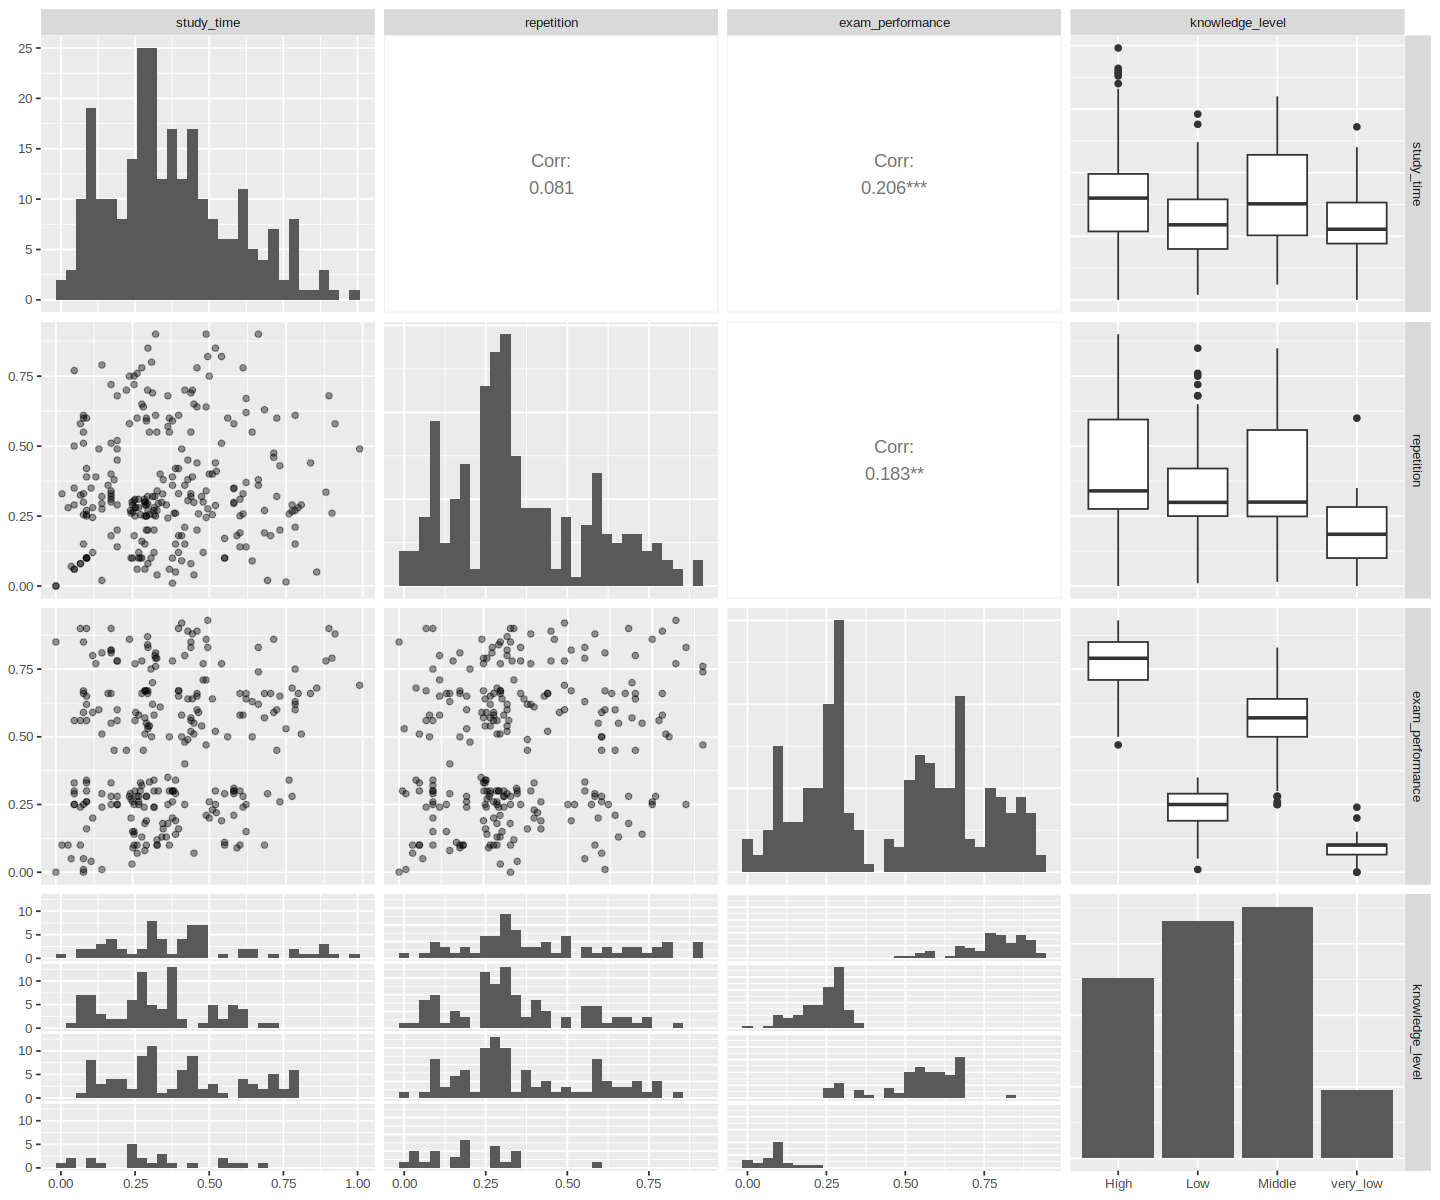

In [5]:
options(repr.plot.width = 12, repr.plot.height = 10)
 plot <- user_knowledge_data |> 
     ggpairs(
         lower = list(continuous = wrap('points', alpha = 0.4)),
         diag = list(continuous = "barDiag")
     ) +
     theme(text = element_text(size = 10))
plot

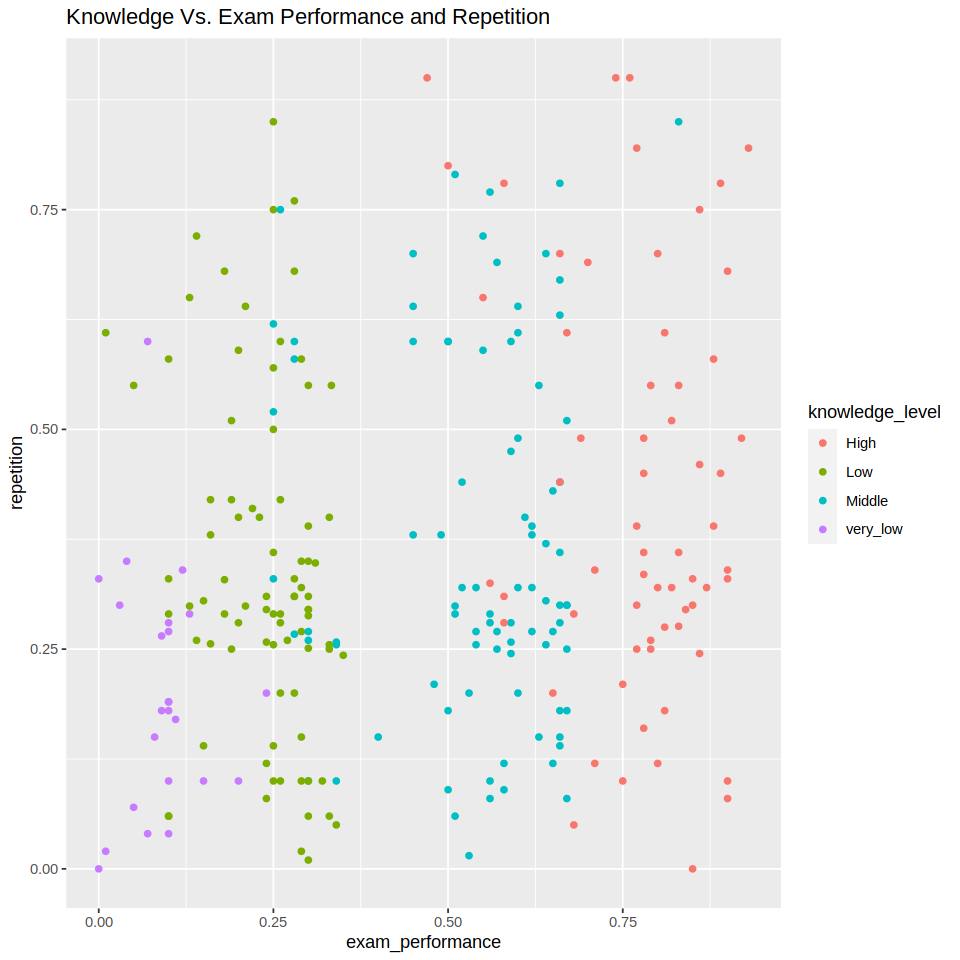

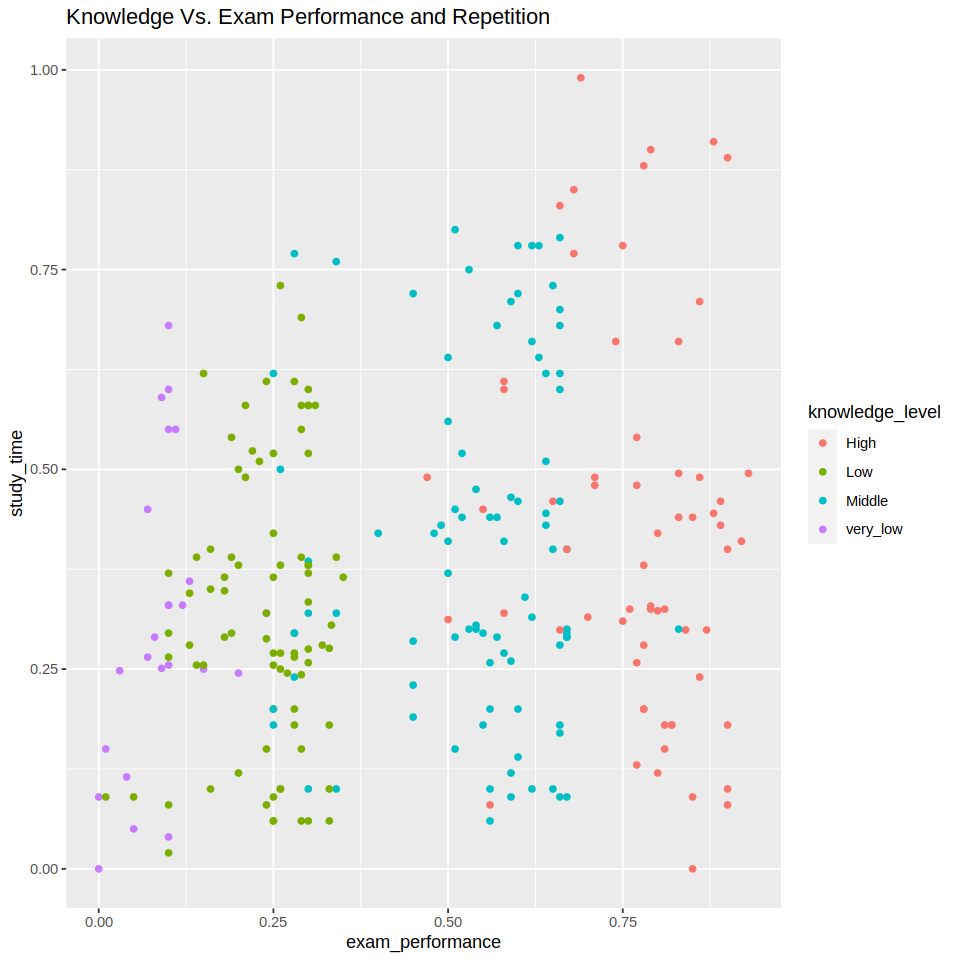

In [6]:
options(repr.plot.width = 8, repr.plot.height = 8)
scatter <- user_knowledge_data |> 
     ggplot(aes(x=exam_performance, y=repetition, color=knowledge_level))+
    geom_point()+
    ggtitle("Knowledge Vs. Exam Performance and Repetition")
    
scatter

scatter2 <- user_knowledge_data |> 
     ggplot(aes(x=exam_performance, y=study_time, color=knowledge_level))+
    geom_point()+
    ggtitle("Knowledge Vs. Exam Performance and Repetition")
    
scatter2

In [7]:
set.seed(3456) 
knowledge_split <- initial_split(user_knowledge_data, prop = 0.75, strata = knowledge_level)  
knowledge_train <- training(knowledge_split)   
knowledge_test <- testing(knowledge_split)
knowledge_train
knowledge_test

study_time,repetition,exam_performance,knowledge_level
<dbl>,<dbl>,<dbl>,<fct>
0.08,0.08,0.90,High
0.00,0.00,0.85,High
0.10,0.10,0.90,High
⋮,⋮,⋮,⋮
0.56,0.60,0.50,Middle
0.78,0.61,0.60,Middle
0.50,0.75,0.26,Middle


study_time,repetition,exam_performance,knowledge_level
<dbl>,<dbl>,<dbl>,<fct>
0.10,0.10,0.30,Middle
0.08,0.08,0.24,Low
0.15,0.02,0.01,very_low
⋮,⋮,⋮,⋮
0.54,0.51,0.19,Low
0.61,0.78,0.58,High
0.54,0.82,0.77,High


In [8]:
set.seed(2020)
knowledge_recipe <- recipe(knowledge_level ~ study_time+repetition+exam_performance , data = knowledge_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knowledge_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [9]:
set.seed(2020)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
       set_engine("kknn") |>
       set_mode("classification")

knowledge_fit <- workflow() |>
       add_recipe(knowledge_recipe) |>
       add_model(knn_spec) |>
       fit(data = knowledge_train)

knowledge_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.238342
Best kernel: rectangular
Best k: 5

In [10]:
set.seed(2020) 



knowledge_test_predictions <- predict(knowledge_fit , knowledge_test) |>
       bind_cols(knowledge_test)
knowledge_test_predictions

.pred_class,study_time,repetition,exam_performance,knowledge_level
<fct>,<dbl>,<dbl>,<dbl>,<fct>
Low,0.10,0.10,0.30,Middle
Low,0.08,0.08,0.24,Low
very_low,0.15,0.02,0.01,very_low
⋮,⋮,⋮,⋮,⋮
Low,0.54,0.51,0.19,Low
Middle,0.61,0.78,0.58,High
High,0.54,0.82,0.77,High


In [11]:
knowledge_prediction_accuracy <- knowledge_test_predictions |>
         metrics(truth = knowledge_level, estimate = .pred_class)
knowledge_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7538462
kap,multiclass,0.6525226


In [12]:
set.seed(2020) # DO NOT REMOVE
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors =tune()) |>
       set_engine("kknn") |>
       set_mode("classification")


knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [15]:
set.seed(2020)
knowledge_vfold <- vfold_cv(knowledge_train, v = 5, strata = knowledge_level)

In [16]:
knowledge_resample_fit <- workflow() |>
      add_recipe(knowledge_recipe) |>
       add_model(knn_spec) |>
       fit_resamples(resamples = knowledge_vfold)

In [17]:
knowledge_metrics <- collect_metrics(knowledge_resample_fit)
knowledge_metrics

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,multiclass,0.7512490,5,0.02970080,Preprocessor1_Model1
roc_auc,hand_till,0.9305069,5,0.01771125,Preprocessor1_Model1


In [18]:
set.seed(2020)
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors =tune()) |>
       set_engine("kknn") |>
       set_mode("classification")


knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [19]:
set.seed(1234) 


knn_results <- workflow() |>
      add_recipe(knowledge_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = knowledge_vfold, grid = 7) |>
       collect_metrics()
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,accuracy,multiclass,0.7667827,5,0.02905128,Preprocessor1_Model1
3,roc_auc,hand_till,0.8903483,5,0.02298870,Preprocessor1_Model1
6,accuracy,multiclass,0.7461208,5,0.02936544,Preprocessor1_Model2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
11,roc_auc,hand_till,0.9140338,5,0.01338769,Preprocessor1_Model5
13,accuracy,multiclass,0.7455872,5,0.02074629,Preprocessor1_Model6
13,roc_auc,hand_till,0.9042744,5,0.01208376,Preprocessor1_Model6


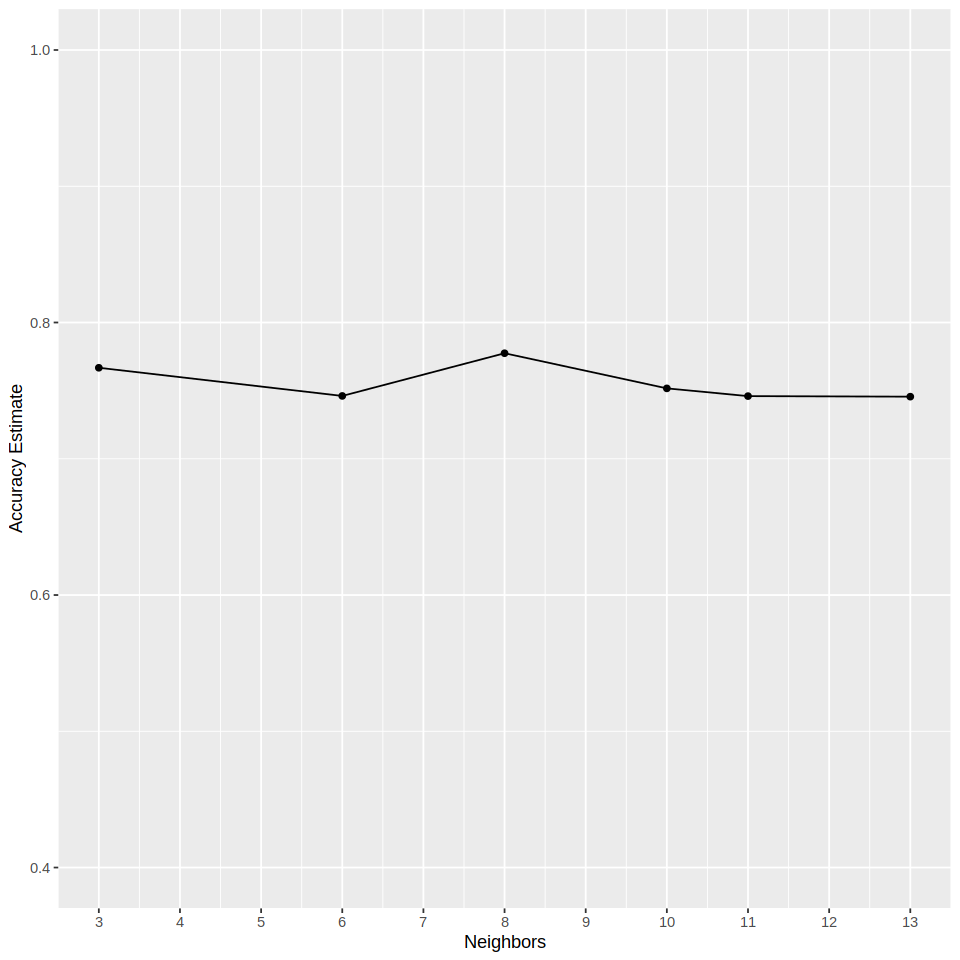

In [20]:
accuracies <- knn_results |> 
filter(.metric == "accuracy")

accuracy_versus_k<- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracy_versus_k

# Discussion:

# References: